In [1]:
import pandas as pd
from pandas import DataFrame, Series
from numpy import nan
import pathlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,5)
import seaborn as sns
sns.set()

In [2]:
cols = [
"TEST","MAP",
50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 500000,
600000, 700000, 800000, 900000, 1000000,
2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000,
15000000, 20000000, 25000000, 30000000, 35000000, 40000000, 45000000, 50000000
]
if not pathlib.Path("./sorted.csv").is_file():
    data = pd.read_csv("results.csv", quotechar="'", header=None)
    data.columns= cols
    data = data.sort_values(by=['TEST', 'MAP'], ignore_index=True)
    data.to_csv("sorted.csv")

else:
    data = pd.read_csv("sorted.csv")
    data.set_index("Unnamed: 0", inplace=True)
data.head()

TEST                  MAP  50000  100000  150000  200000  \
Unnamed: 0                                                                   
0           int_delete  absl::flat_hash_map      9      14      11      14   
1           int_delete  absl::flat_hash_map      9      14      11      14   
2           int_delete  absl::flat_hash_map      9      14      11      14   
3           int_delete  absl::flat_hash_map      9      14      11      14   
4           int_delete  absl::flat_hash_map      9      14      11      14   

            250000  300000  350000  400000  ...  9000000  10000000  15000000  \
Unnamed: 0                                  ...                                
0               11      12      13      15  ...       21        21        24   
1               11      12      13      16  ...       20        23        24   
2               11      12      13      15  ...       20        21        24   
3               11      12      13      15  ...       21        21        24   
4               11      12      13      15  ...       20        20        24   

            20000000  25000000  30000000  35000000  40000000  45000000  \
Unnamed: 0                                                               
0                 28        25        25        26        25        26   
1                 23        27        26        26        26        26   
2                 24        25        26        26        30        26   
3                 24        25        25        26        29        26   
4                 24        25        26        26        26        26   

            50000000  
Unnamed: 0            
0                 26  
1                 26  
2                 27  
3                 26  
4                 27  

[5 rows x 33 columns]

In [3]:
def remove_with_iqr(data):
    stats = data.describe()
    IQR = stats["75%"] - stats["25%"]
    min_cutoff = stats["25%"] - 1.5 * IQR
    max_cutoff = stats["75%"] + 1.5 * IQR
    lower_max = data <= max_cutoff
    higher_min = data >= min_cutoff
    data = data * lower_max * higher_min
    data = data.replace(0, nan)
    return data
    
def remove_with_zscore(data, cutoff=3.5):
    stats = data.describe()
    if not stats["std"]:
        return data
    z = abs((data - stats["mean"]) / stats["std"])
    cut = z <= cutoff
    data = data * cut
    data = data.replace(0, nan)
    return data 

def remove_with_modified_z_score(data, treshold=3.5):
    stats = data.describe()
    median_absolute_deviation = abs(data - data.median()).median()
    if not median_absolute_deviation:
        return data
    modified_z_scores = abs(0.6745 * (data - data.median()) / median_absolute_deviation)
    cutoff = modified_z_scores <= treshold
    data = data * cutoff
    data = data.replace(0, nan)
    return data

def max_val(hmap, test):
    return groups_mean.loc[test, hmap].max()

def sort_maps(test):
    maps = list(groups_mean.loc[test].index)
    new = [(max_val(i, test), i) for i in maps]
    new.sort()
    new = [i[1] for i in new]
    return new

def plot_test(test, include_error=True):
    sizes = [50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 500000,
        600000, 700000, 800000, 900000, 1000000,
        2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000,
        15000000, 20000000, 25000000, 30000000, 35000000, 40000000, 45000000, 50000000]
    maps = sort_maps(test)
    count = 16
    repeats = [0, 5, 11]
    while count > -1:
        if not count and count not in repeats:
            break
        mp = maps[count]
        else:
            sns.lineplot(x=sizes, y=groups_mean.loc[test, mp], label=mp, order=2)
        if count in repeats:
            plt.xscale("log")
            plt.ylabel("{} time (ns)".format(test))
            plt.legend()
            plt.title(test)
            plt.show()
            repeats.pop(repeats.index(count))
        else:
            count -=1

In [4]:
iqr_data = data.copy(True)
# modz_data = data.copy(True)
# z_data = data.copy(True)

In [5]:
for col in range(2,33):
    for row in range(8 * 17):
        start = row * 30
        end = (row + 1 ) * 30
        temp = data.iloc[start : end,col]
        iqr_data.iloc[start : end,col] = remove_with_iqr(temp)
#         modz_data.iloc[start : end,col] = remove_with_modified_z_score(temp)
#         z_data.iloc[start : end,col] = remove_with_zscore(temp)

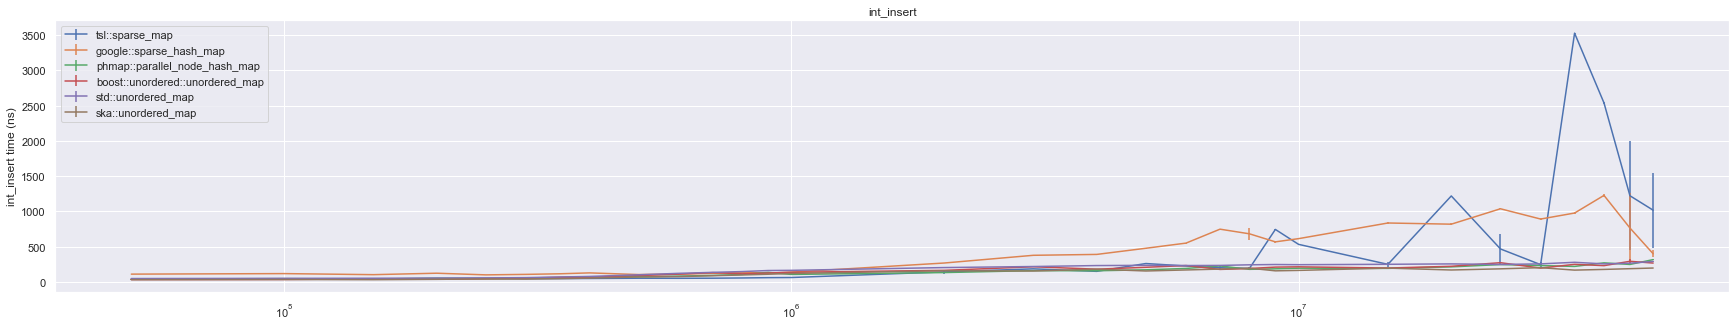

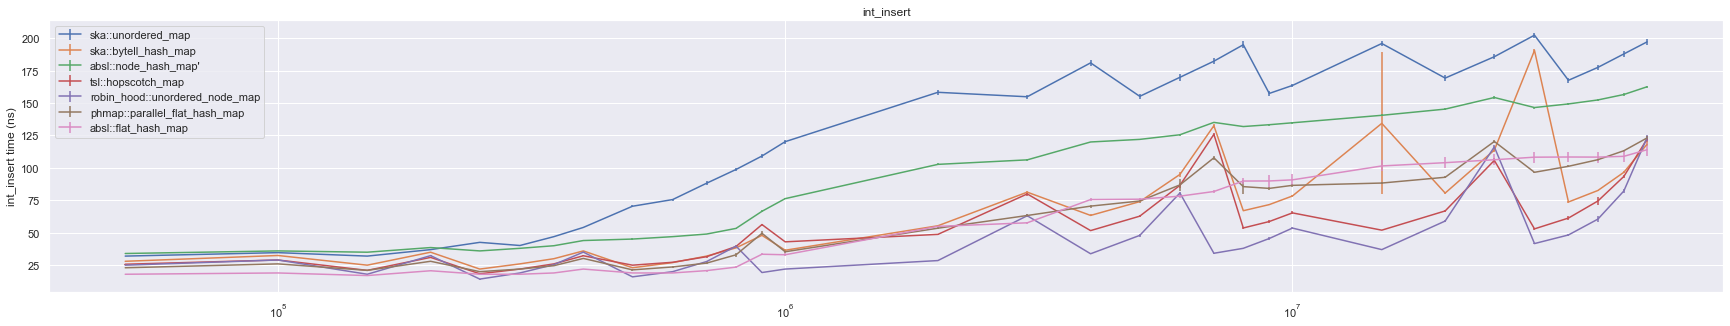

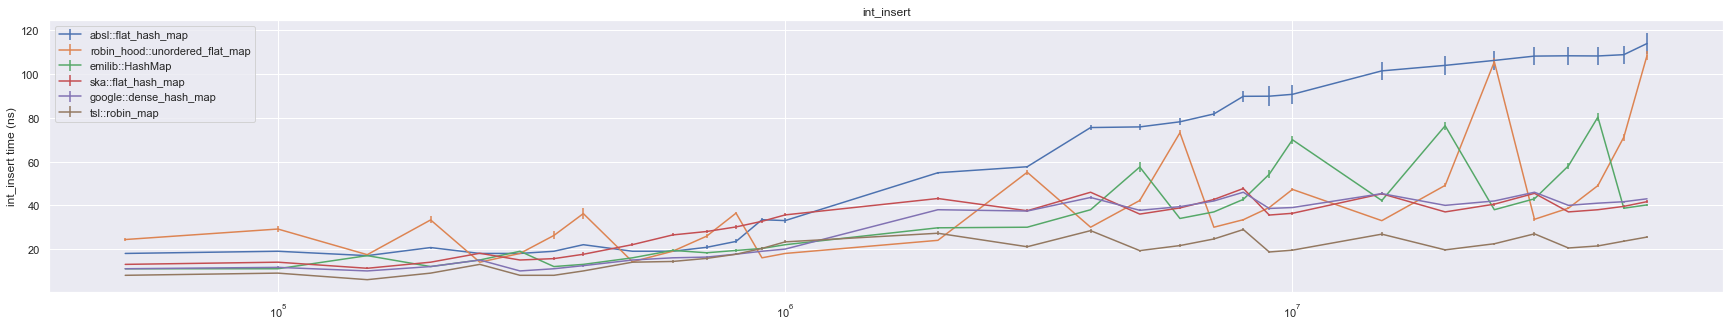

In [6]:
tester = iqr_data # use removed outliers data
groups_modz = tester.groupby(["TEST", "MAP"])
groups_mean = groups_modz.mean()
groups_std = groups_modz.std()
groups_std.columns = [int(i) for i in groups_std.columns]
groups_mean.columns = groups_std.columns
plot_test("int_insert")

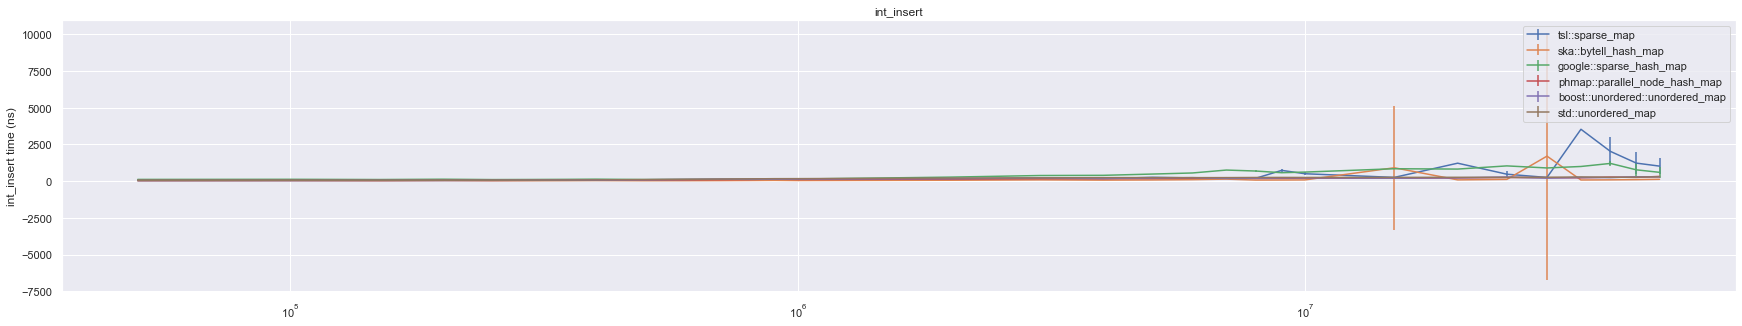

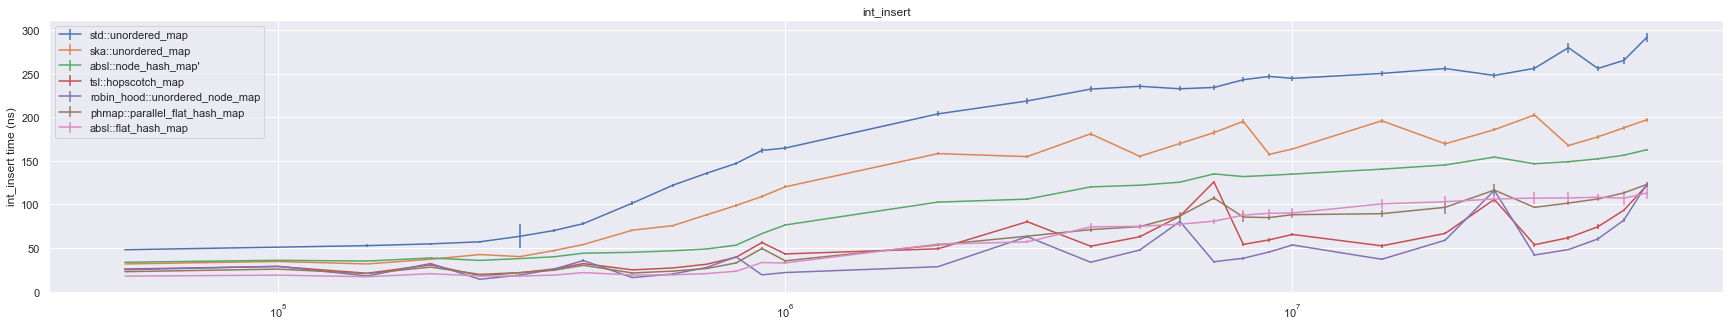

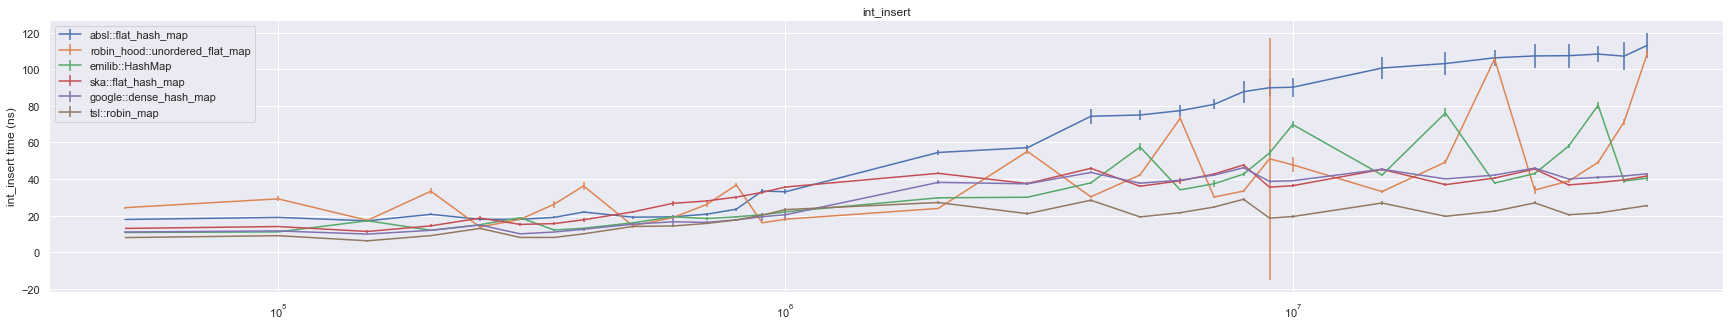

In [7]:
tester = data # use original data
groups_modz = tester.groupby(["TEST", "MAP"])
groups_mean = groups_modz.mean()
groups_std = groups_modz.std()
groups_std.columns = [int(i) for i in groups_std.columns]
groups_mean.columns = groups_std.columns
plot_test("int_insert")

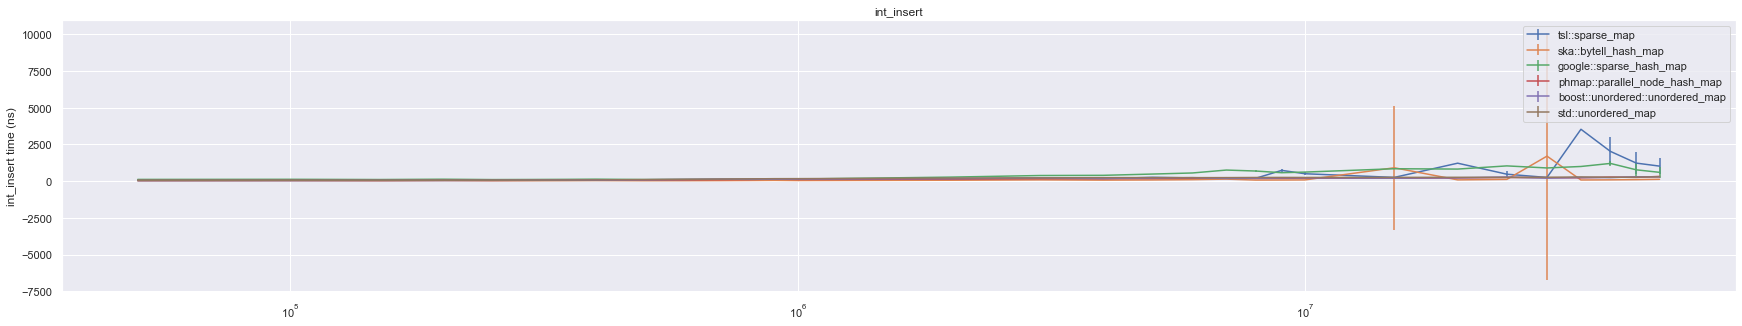

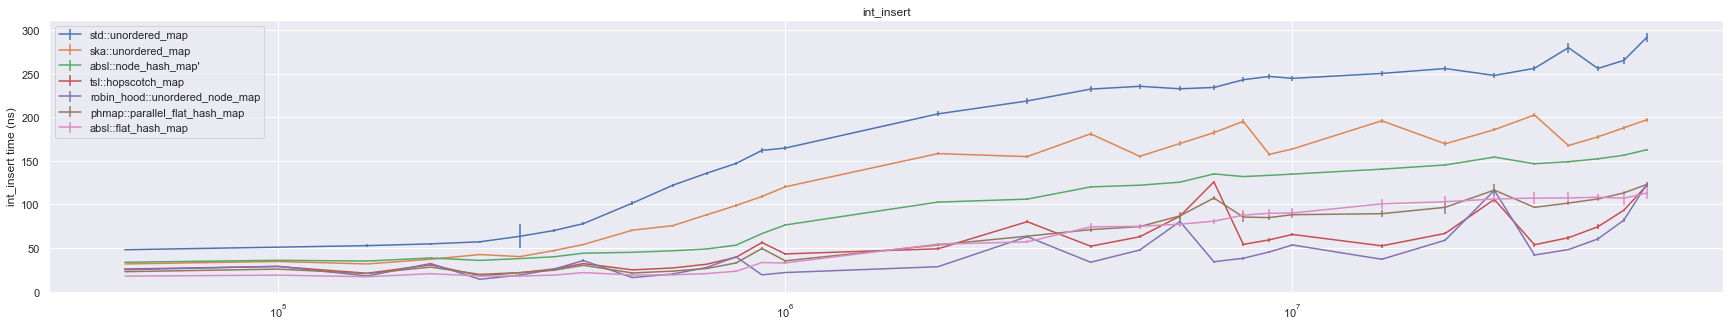

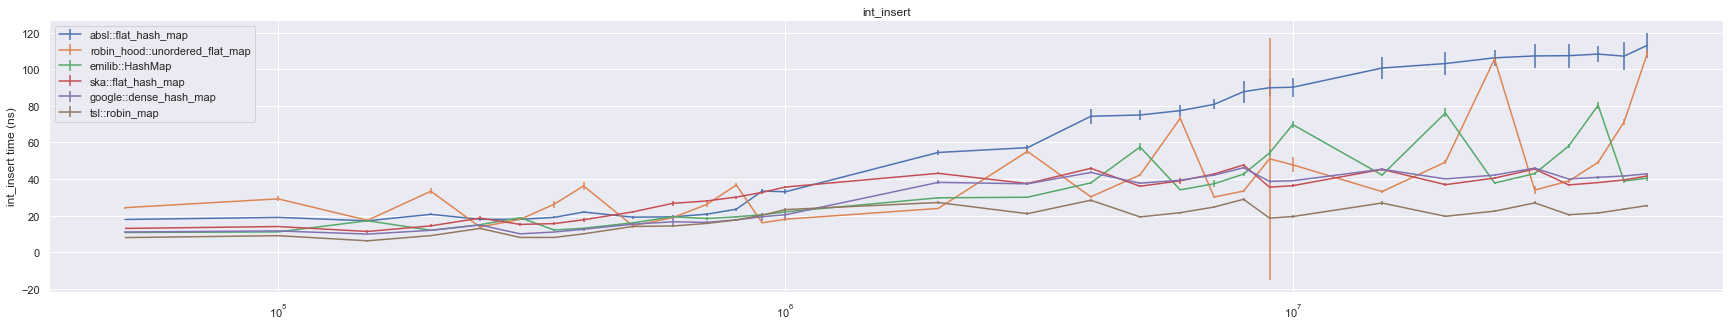

In [8]:
tests = data["TEST"].unique()
plot_test(tests[1])


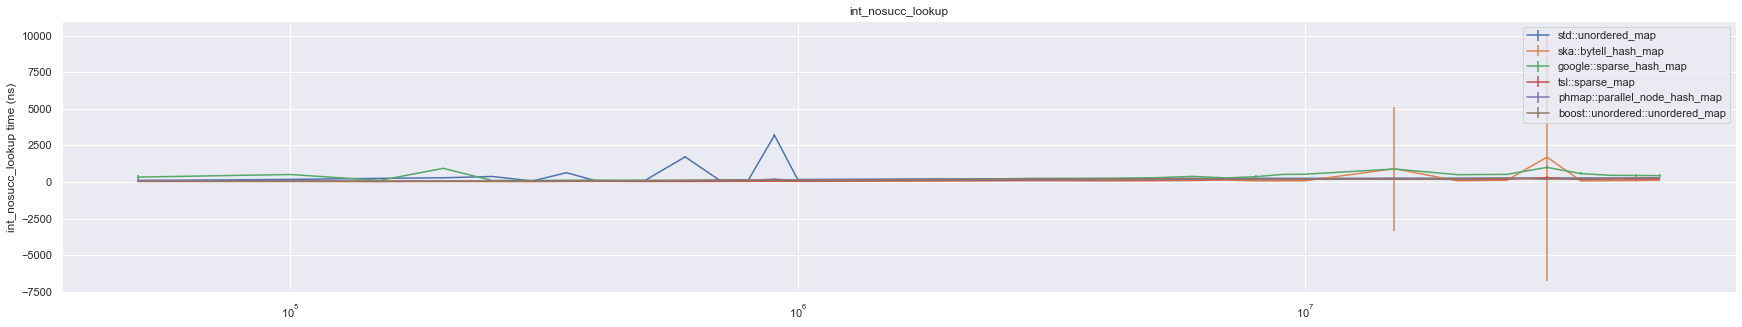

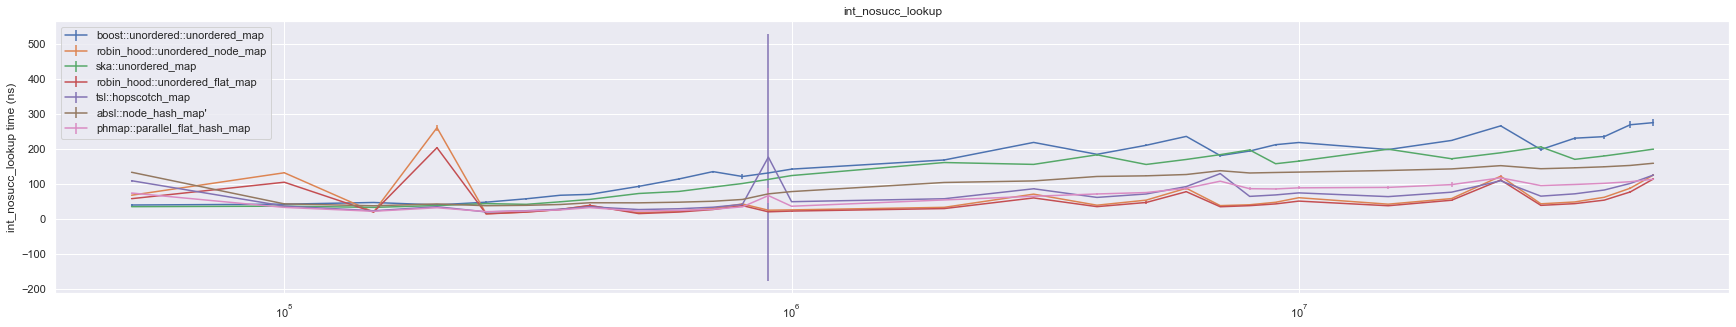

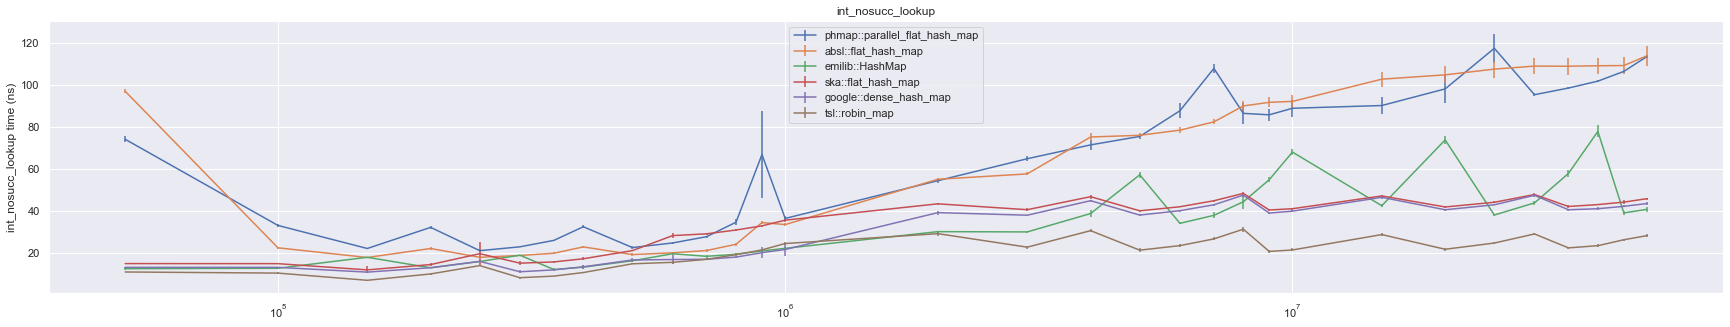

In [9]:
plot_test(tests[2])

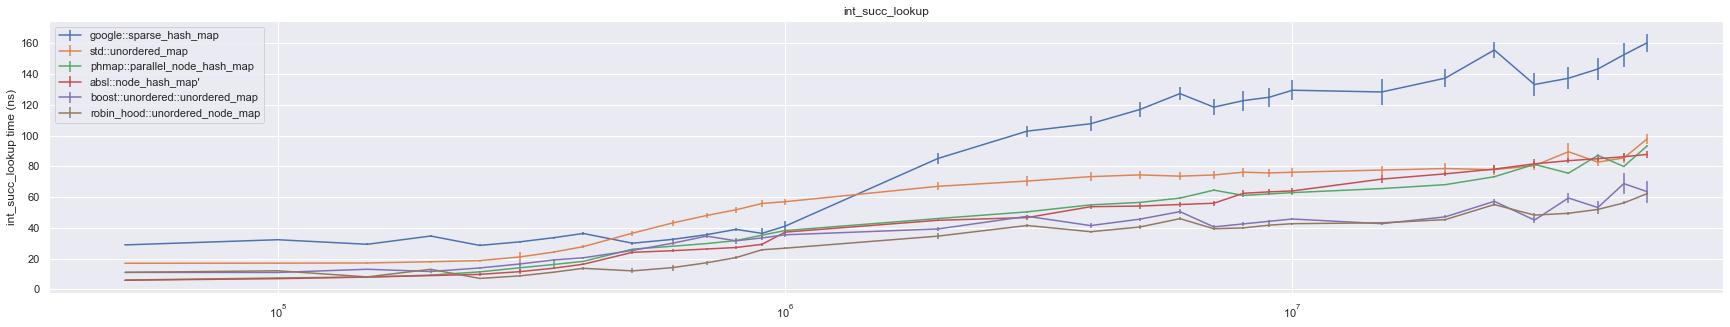

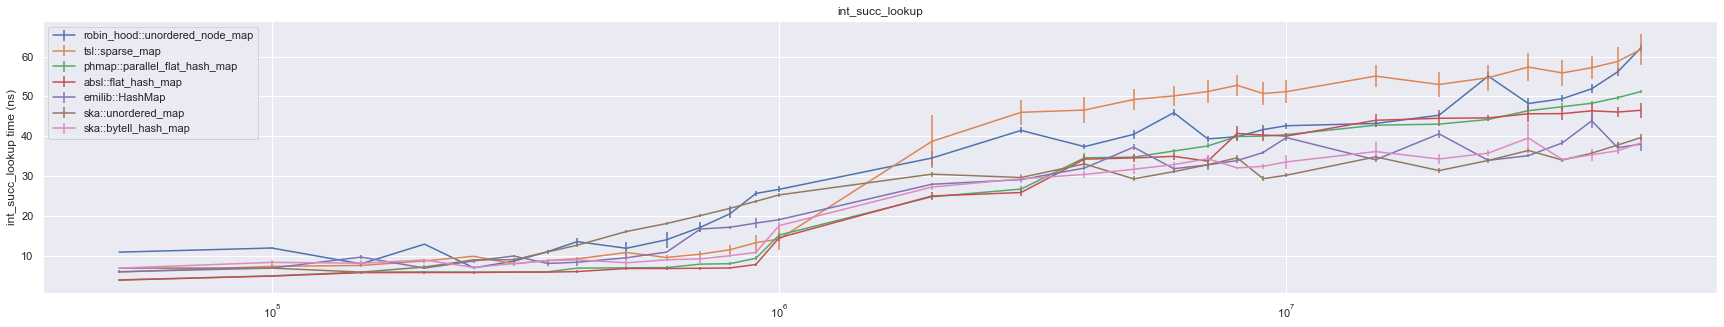

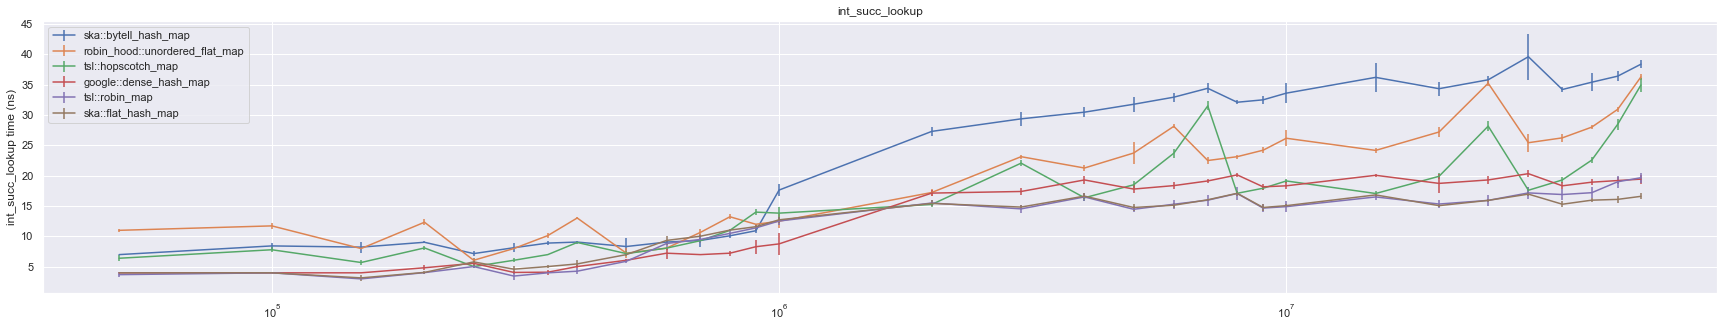

In [10]:
plot_test(tests[3])

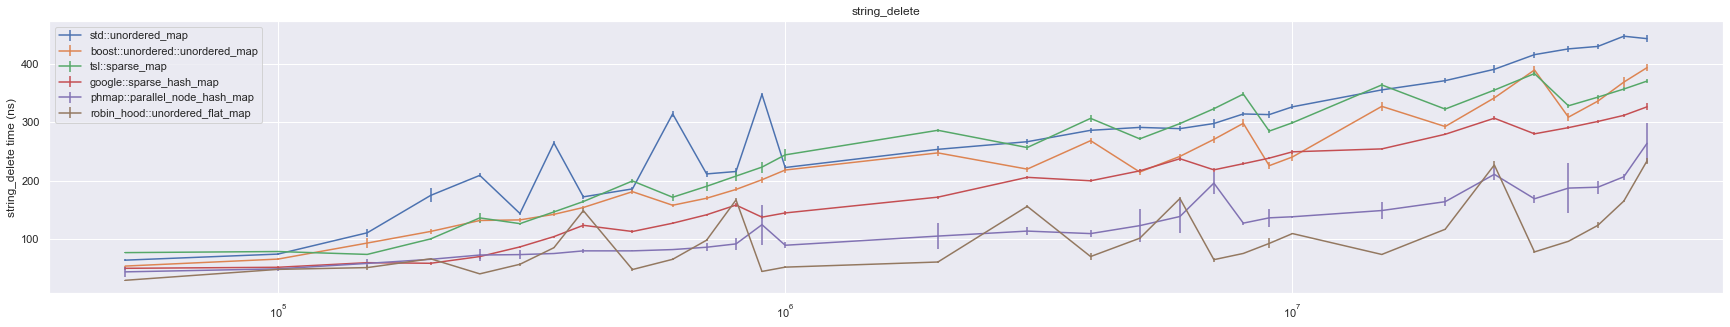

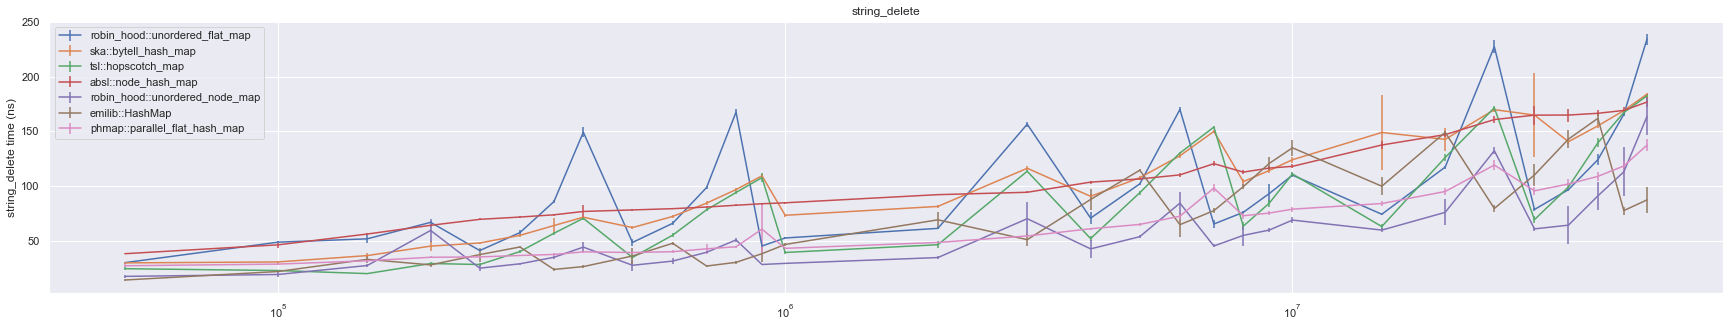

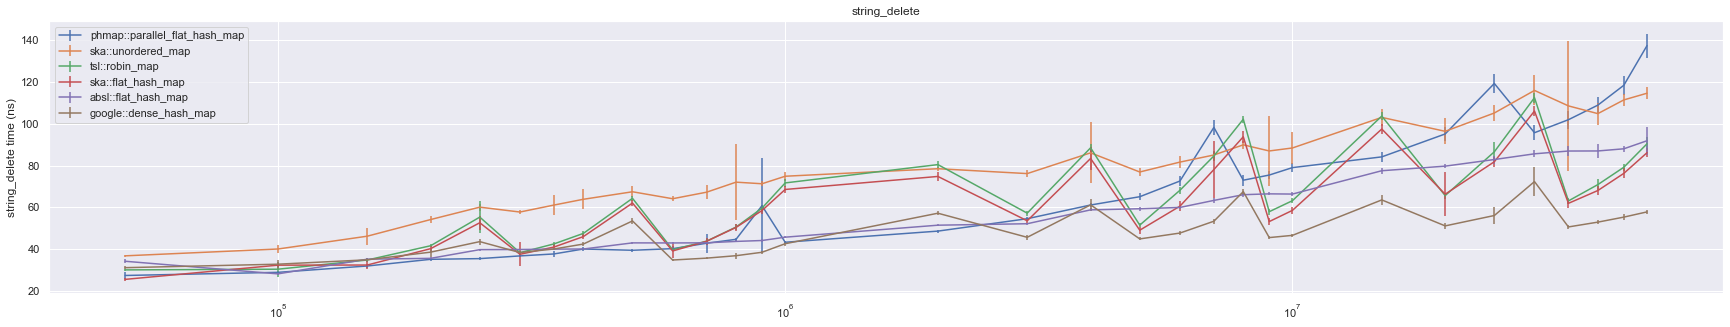

In [11]:
plot_test(tests[4])